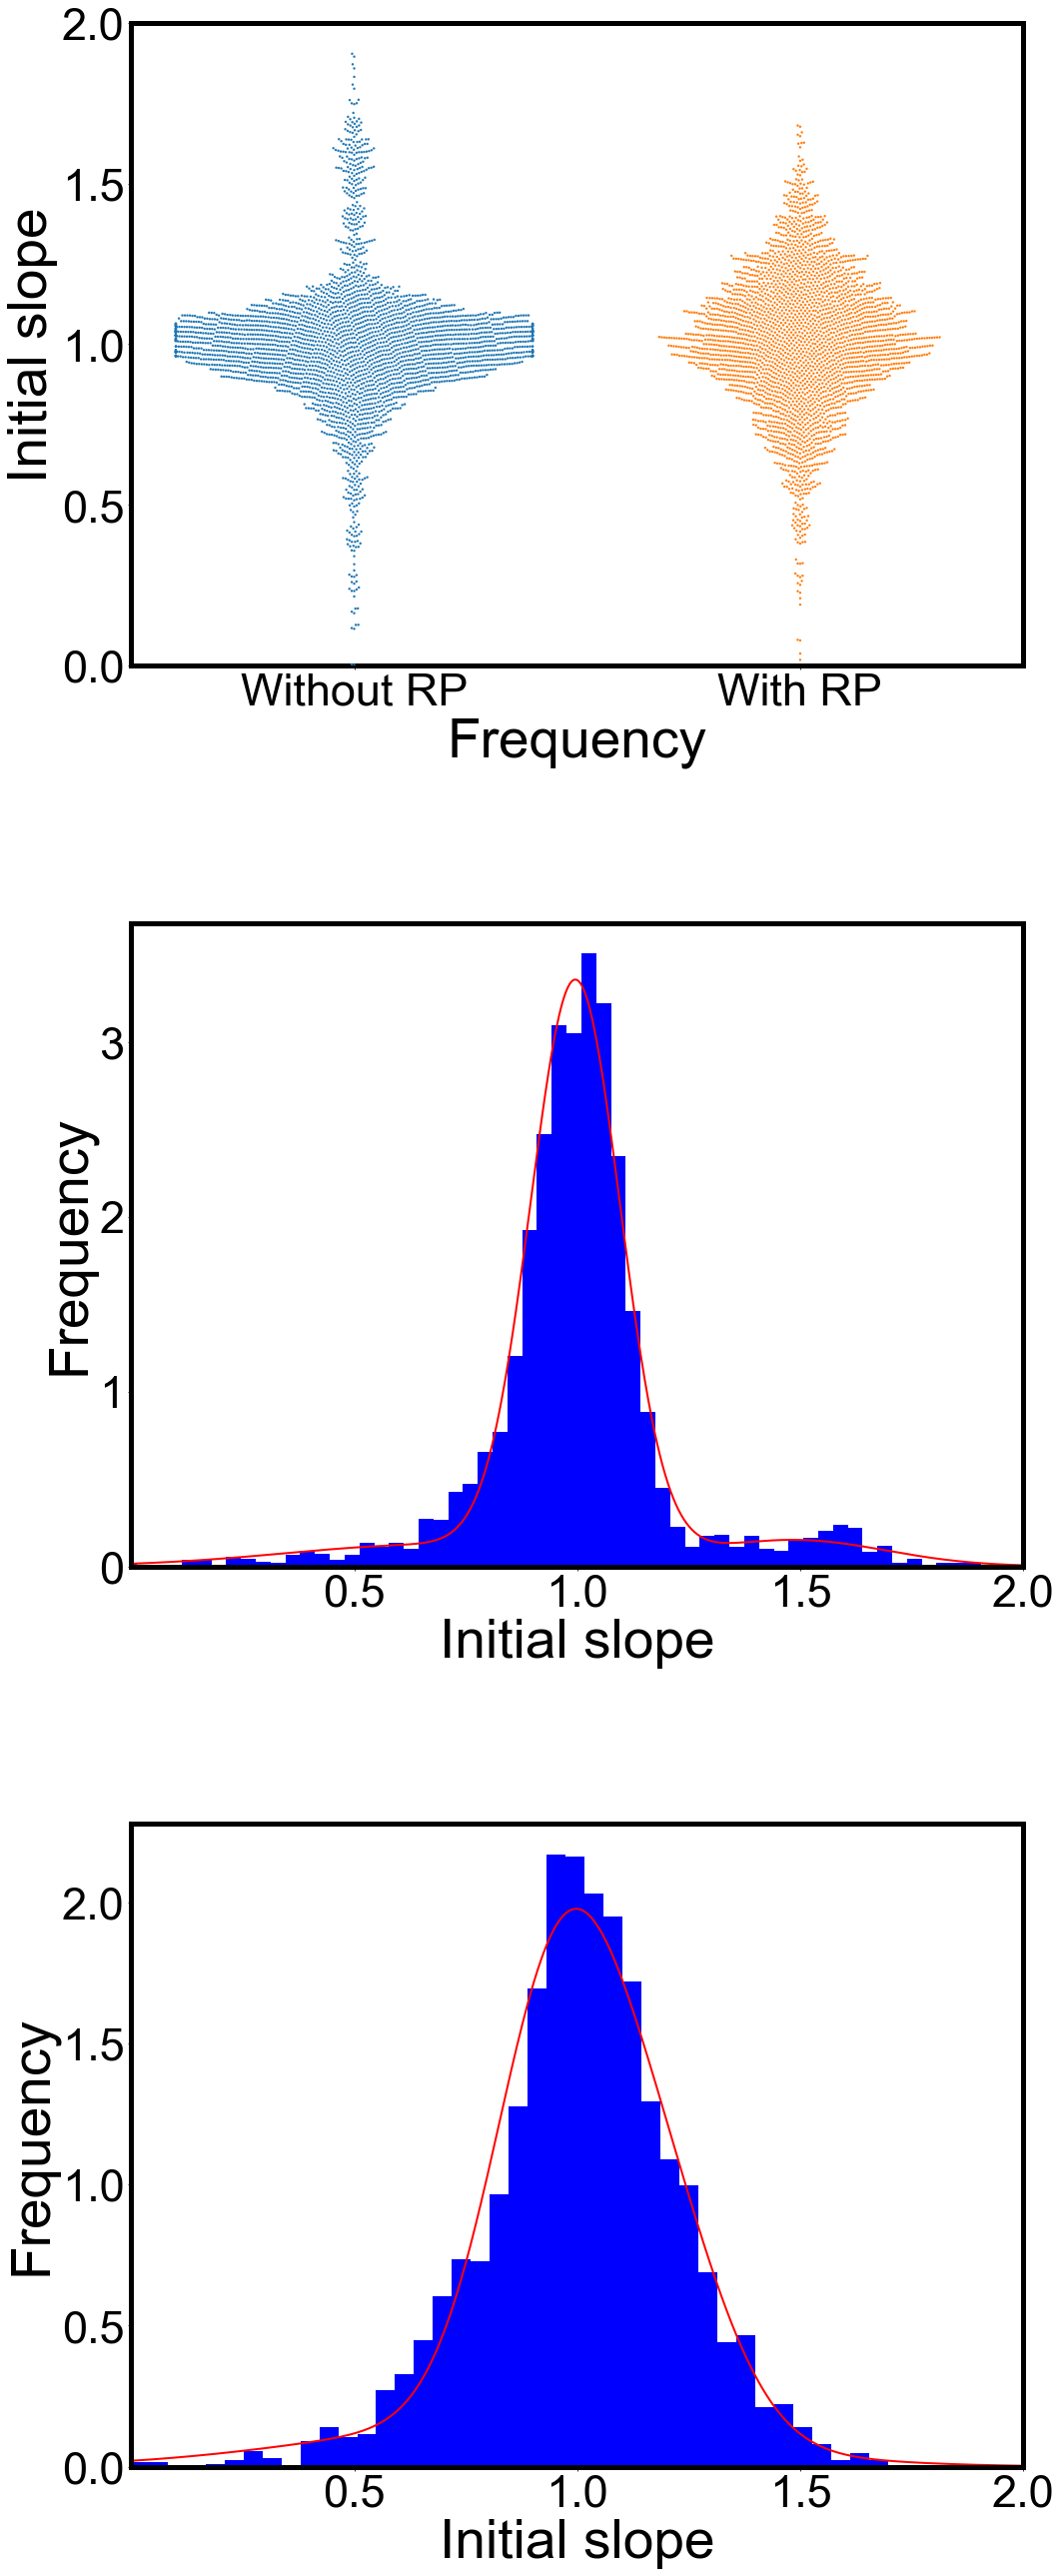

Parameters for the 'no_RP' group:
Gaussian 1: Mean=0.9961658177047075, Covariance=0.010090232510748582, Weight=0.823743081646006
Gaussian 2: Mean=1.4958329947536326, Covariance=0.040323538786140006, Weight=0.07328373380709961
Gaussian 3: Mean=0.6777985238897107, Covariance=0.10911412609834249, Weight=0.1029731845468958

Parameters for the 'RP' group:
Gaussian 1: Mean=1.175719985233938, Covariance=0.02217467683871606, Weight=0.2814255779162395
Gaussian 2: Mean=0.8418076571470401, Covariance=0.18483584787498009, Weight=0.15779560943714582
Gaussian 3: Mean=0.9563285190259938, Covariance=0.021374678586835054, Weight=0.5607788126466147


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

plt.rcParams['xtick.labelsize'] = 45
plt.rcParams['ytick.labelsize'] = 45
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

Slopes_noRP = []
Slopes_RP = []

with open("Slopes_noRP.txt", "r") as file:
    for line in file:
        Slopes_noRP.append(float(line.rstrip()))

with open("Slopes_RP.txt", "r") as file:
    for line in file:
        Slopes_RP.append(float(line.rstrip()))

GFP_noRP = []
GFP_RP = []

with open("GFP_noRP.txt", "r") as file:
    for line in file:
        GFP_noRP.append(float(line.rstrip()))

with open("GFP_RP.txt", "r") as file:
    for line in file:
        GFP_RP.append(float(line.rstrip()))

slopesGFP_noRP = pd.DataFrame({'GFP': GFP_noRP, 'slopes': Slopes_noRP})
slopesGFP_noRP_new = slopesGFP_noRP.drop(slopesGFP_noRP[slopesGFP_noRP['GFP'] >= 800].index)
slopesGFP_noRP_corrected = slopesGFP_noRP_new.drop(slopesGFP_noRP_new[slopesGFP_noRP_new['GFP'] <= 600].index)

slopesGFP_RP = pd.DataFrame({'GFP': GFP_RP, 'slopes': Slopes_RP})
slopesGFP_RP_new = slopesGFP_RP.drop(slopesGFP_RP[slopesGFP_RP['GFP'] >= 800].index)
slopesGFP_RP_corrected = slopesGFP_RP_new.drop(slopesGFP_RP_new[slopesGFP_RP_new['GFP'] <= 600].index)

mean_noRP = sum(Slopes_noRP) / len(Slopes_noRP)
Slopesnormed_noRP = [item / mean_noRP for item in Slopes_noRP]
Group_noRP = ['Without RP'] * len(Slopesnormed_noRP)
data_noRP = pd.DataFrame({'Group': Group_noRP, 'data': Slopesnormed_noRP})

mean_RP = sum(Slopes_RP) / len(Slopes_RP)
Slopesnormed_RP = [item / mean_RP for item in Slopes_RP]
Group_RP = ['With RP'] * len(Slopesnormed_RP)
data_RP = pd.DataFrame({'Group': Group_RP, 'data': Slopesnormed_RP})

data_all = pd.concat([data_noRP, data_RP])

# Fit a mixed Gaussian distribution with three Gaussians to the "no_RP" data
gmm_noRP = GaussianMixture(n_components=3, random_state=0)
gmm_noRP.fit(data_noRP['data'].values.reshape(-1, 1))

# Fit a mixed Gaussian distribution with three Gaussians to the "RP" data
gmm_RP = GaussianMixture(n_components=3, random_state=0)
gmm_RP.fit(data_RP['data'].values.reshape(-1, 1))

# Retrieve the parameters of the Gaussian components for "no_RP" group
means_noRP = gmm_noRP.means_.flatten()
covs_noRP = gmm_noRP.covariances_.flatten()
weights_noRP = gmm_noRP.weights_

# Retrieve the parameters of the Gaussian components for "RP" group
means_RP = gmm_RP.means_.flatten()
covs_RP = gmm_RP.covariances_.flatten()
weights_RP = gmm_RP.weights_

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 45))

# Plot the swarmplot
sns.swarmplot(x='Group', y='data', data=data_all, size=2.4, ax=ax1)

# Set labels and limits for the swarmplot
ax1.set_xlabel('Frequency', fontsize=55)
ax1.set_ylabel('Initial slope', fontsize=55)
ax1.set_ylim(0, 2)

# Plot the histogram for the "no_RP" group
counts, bins, _ = ax2.hist(data_noRP['data'], bins=100, color='blue', density=True)

# Plot the Gaussian components for "no_RP" group
x = np.linspace(0, 2, 1000)
y = np.zeros_like(x)
for mean, cov, weight in zip(means_noRP, covs_noRP, weights_noRP):
    y += weight * norm.pdf(x, mean, np.sqrt(cov))
ax2.plot(x, y, color='red', linewidth=2)

# Set labels and limits for the histogram
ax2.set_xlabel('Initial slope', fontsize=55)
ax2.set_ylabel('Frequency', fontsize=55)
ax2.set_xlim(0, 2)
ax2.set_xticks([0.5, 1, 1.5, 2])
# Plot the histogram for the "RP" group
counts, bins, _ = ax3.hist(data_RP['data'], bins=100, color='blue', density=True)

# Plot the Gaussian components for "RP" group
x = np.linspace(0, 2, 1000)
y = np.zeros_like(x)
for mean, cov, weight in zip(means_RP, covs_RP, weights_RP):
    y += weight * norm.pdf(x, mean, np.sqrt(cov))
ax3.plot(x, y, color='red', linewidth=2)

# Set labels and limits for the histogram
ax3.set_xlabel('Initial slope', fontsize=55)
ax3.set_ylabel('Frequency', fontsize=55)
ax3.set_xlim(0, 2)
ax3.set_xticks([0.5, 1, 1.5, 2])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Save the figure
plt.savefig("Histogram_and_Gaussian_Fit_Scaled.png", dpi=100, format='png')

# Show the plot
plt.show()

# Print the parameters for "no_RP" group
print("Parameters for the 'no_RP' group:")
for i in range(3):
    print(f"Gaussian {i+1}: Mean={means_noRP[i]}, Covariance={covs_noRP[i]}, Weight={weights_noRP[i]}")

# Print the parameters for "RP" group
print("\nParameters for the 'RP' group:")
for i in range(3):
    print(f"Gaussian {i+1}: Mean={means_RP[i]}, Covariance={covs_RP[i]}, Weight={weights_RP[i]}")


/root/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/root/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


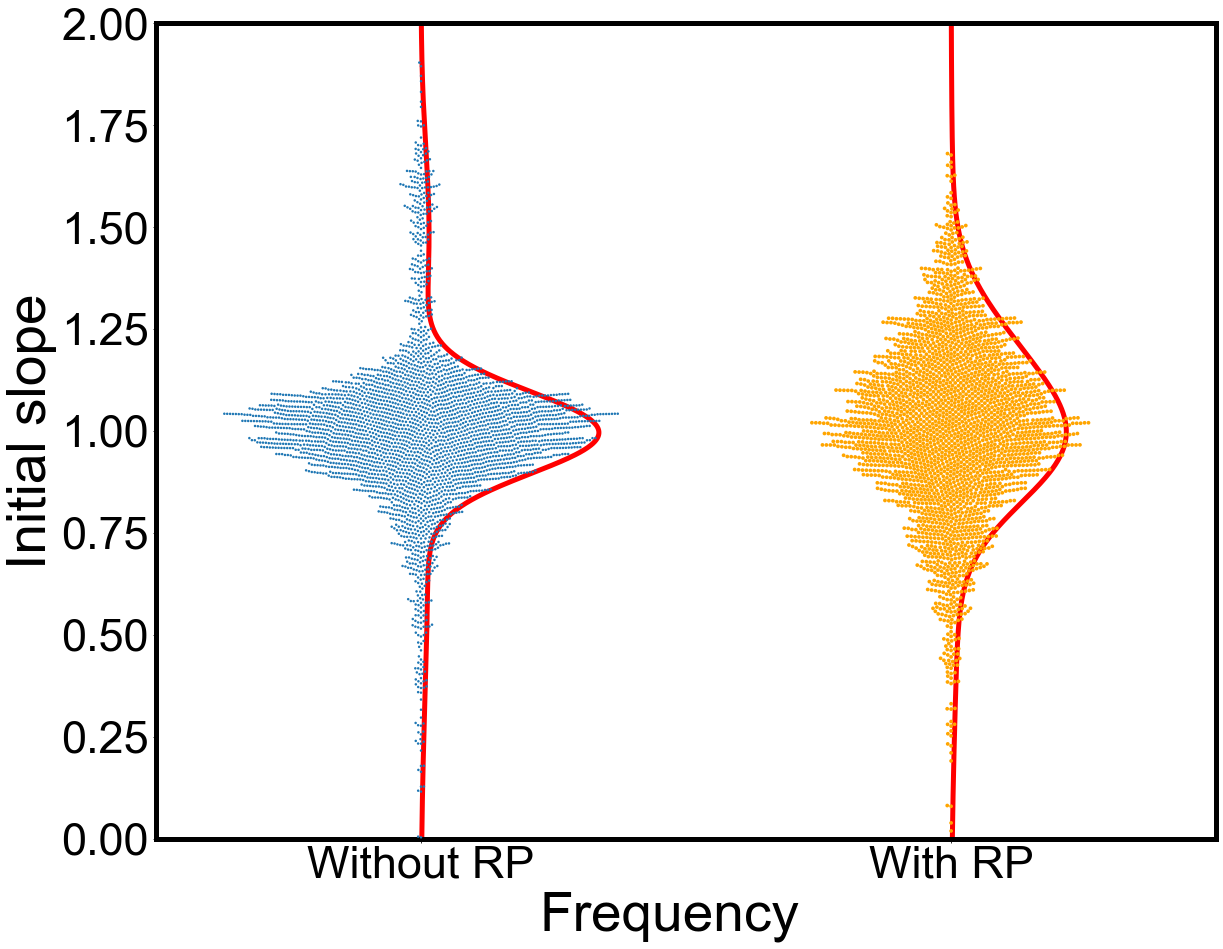

Parameters for the 'no_RP' group:
Gaussian 1: Mean=0.9961658177047075, Covariance=0.010090232510748582, Weight=0.823743081646006
Gaussian 2: Mean=1.4958329947536326, Covariance=0.040323538786140006, Weight=0.07328373380709961
Gaussian 3: Mean=0.6777985238897107, Covariance=0.10911412609834249, Weight=0.1029731845468958

Parameters for the 'RP' group:
Gaussian 1: Mean=1.175719985233938, Covariance=0.02217467683871606, Weight=0.2814255779162395
Gaussian 2: Mean=0.8418076571470401, Covariance=0.18483584787498009, Weight=0.15779560943714582
Gaussian 3: Mean=0.9563285190259938, Covariance=0.021374678586835054, Weight=0.5607788126466147


In [2]:
plt.rcParams['figure.figsize'] = 19, 15
plt.rcParams['xtick.labelsize'] = 45
plt.rcParams['ytick.labelsize'] = 45
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

# Create a figure with two subplots side by side
fig, (ax4, ax5) = plt.subplots(1, 2, sharey=True)

# Plot the swarmplot for the "no_RP" group on the left
sns.swarmplot(data=data_noRP, size=2.5, ax=ax4)
ax4.set_xticklabels(['Without RP'])  

# Plot the Gaussian components for "no_RP" group
x = np.linspace(0, 2, 1000)
y = np.zeros_like(x)
for mean, cov, weight in zip(means_noRP, covs_noRP, weights_noRP):
    y += weight * norm.pdf(x, mean, np.sqrt(cov))
ax4.plot(y * 0.10, x, color='red', linewidth=5)

# Set labels and limits for the swarmplot on the left
ax4.set_ylabel('Initial slope', fontsize=55)
ax4.set_ylim(0, 2)

# Remove the line between subplots
fig.subplots_adjust(wspace=0)

# Plot the swarmplot for the "RP" group on the right
sns.swarmplot(data=data_RP, size=3.75, ax=ax5, color='orange')
ax5.set_xticklabels(['With RP'])  

# Overlay the Gaussian components for "RP" group on the swarmplot
x = np.linspace(0, 2, 1000)
y = np.zeros_like(x)
for mean, cov, weight in zip(means_RP, covs_RP, weights_RP):
    y += weight * norm.pdf(x, mean, np.sqrt(cov))
ax5.plot(y * 0.11, x, color='red', linewidth=5)

# Set labels and limits for the swarmplot on the right
ax5.set_ylabel('')  # Remove y-axis label
ax5.set_ylim(0, 2)

# Remove the line between subplots
ax4.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax4.tick_params(right=False)
ax5.tick_params(left=False)

# Add 'Frequency' label
label = fig.text(0.5, 0, 'Frequency', ha='center', fontsize=55)

# Adjust its position a bit lower than the other labels
label.set_position((0.5, +0.04))

# Save the figure
plt.savefig("Swarmplot_with_Gaussian_Fit.svg", dpi=300, format='svg')

# Show the plot
plt.show()

# Print the parameters for "no_RP" group
print("Parameters for the 'no_RP' group:")
for i in range(3):
    print(f"Gaussian {i+1}: Mean={means_noRP[i]}, Covariance={covs_noRP[i]}, Weight={weights_noRP[i]}")

# Print the parameters for "RP" group
print("\nParameters for the 'RP' group:")
for i in range(3):
    print(f"Gaussian {i+1}: Mean={means_RP[i]}, Covariance={covs_RP[i]}, Weight={weights_RP[i]}")

